# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 300)
pd.get_option("display.max_rows")
pd.set_option('display.max_rows', 300)

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os.path import join as opj
import gc

INPUT_PATH = '../../input/feedback-prize-english-language-learning/'

In [2]:
train_df = pd.read_csv(opj(INPUT_PATH, 'train.csv'))
test_df = pd.read_csv(opj(INPUT_PATH, 'test.csv'))
sub_df = pd.read_csv(opj(INPUT_PATH, 'sample_submission.csv'))

print('train_df.shape = ', train_df.shape)
print('test_df.shape = ', test_df.shape)
print('sub_df.shape = ', sub_df.shape)

train_df.shape =  (3911, 8)
test_df.shape =  (3, 2)
sub_df.shape =  (3, 7)


# EDA

In [4]:
all_texts = train_df['full_text'].values

In [6]:
len(all_texts)

3911

In [8]:
from transformers.models.deberta_v2 import DebertaV2TokenizerFast
model_name = 'microsoft/deberta-v3-base'
tokenizer = DebertaV2TokenizerFast.from_pretrained(model_name, trim_offsets=False)
special_tokens_dict = {'additional_special_tokens': ['\n\n']}
_ = tokenizer.add_special_tokens(special_tokens_dict)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [13]:
token_num_list = []

for idx in range(len(all_texts)):
    text = all_texts[idx]
    token_num = len(tokenizer(text)['input_ids'])
    token_num_list.append(token_num)

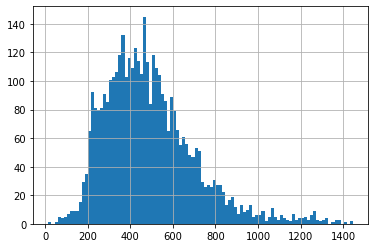

In [15]:
plt.hist(token_num_list, bins=100)
plt.grid();

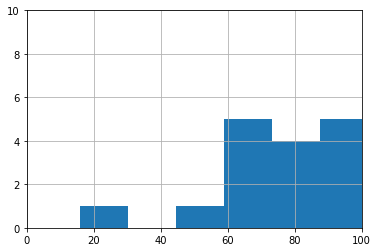

In [18]:
plt.hist(token_num_list, bins=100)
plt.grid()
plt.xlim(0,100)
plt.ylim(0,10);

In [20]:
cols = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']

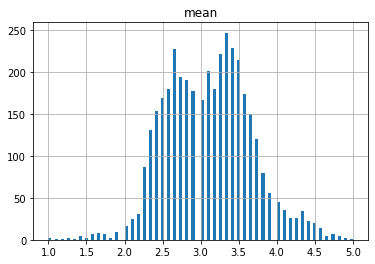

In [23]:
train_df['mean'] = train_df[cols].mean(axis=1)

plt.hist(train_df['mean'].values, bins=100)
plt.title('mean')
plt.grid();

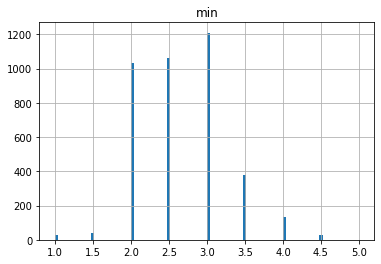

In [25]:
train_df['min'] = train_df[cols].min(axis=1)

plt.hist(train_df['min'].values, bins=100)
plt.title('min')
plt.grid();

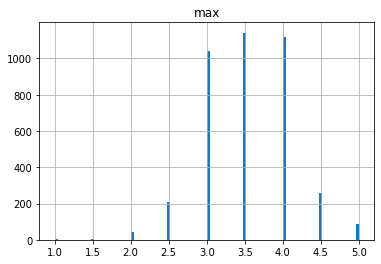

In [27]:
train_df['max'] = train_df[cols].max(axis=1)

plt.hist(train_df['max'].values, bins=100)
plt.title('max')
plt.grid();